In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('house_data.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built
0,221900.0,3,1.00,1180,5650,1.0,1180,1955
1,538000.0,3,2.25,2570,7242,2.0,2170,1951
2,180000.0,2,1.00,770,10000,1.0,770,1933
3,604000.0,4,3.00,1960,5000,1.0,1050,1965
4,510000.0,3,2.00,1680,8080,1.0,1680,1987


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21575 entries, 0 to 21574
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21575 non-null  float64
 1   bedrooms     21575 non-null  int64  
 2   bathrooms    21575 non-null  float64
 3   sqft_living  21575 non-null  int64  
 4   sqft_lot     21575 non-null  int64  
 5   floors       21575 non-null  float64
 6   sqft_above   21575 non-null  int64  
 7   yr_built     21575 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


In [5]:

df.corr()['price'].sort_values(ascending=False)

price          1.000000
sqft_living    0.700809
sqft_above     0.605958
bathrooms      0.524335
bedrooms       0.308200
floors         0.259414
sqft_lot       0.089555
yr_built       0.054780
Name: price, dtype: float64

In [6]:

def plot_function(x_col):
    fig, ax = plt.subplots()
    ax.plot(df[x_col], df['price'])
    ax.set_xlabel("{}".format(x_col))
    ax.set_ylabel("Price")
    ax.set_title("{} vs price".format(x_col))
    plt.show()

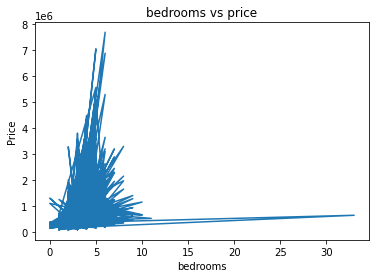

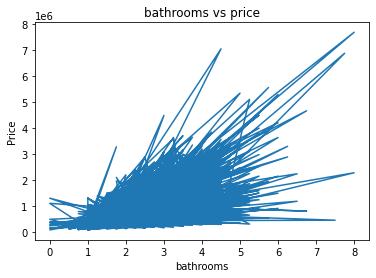

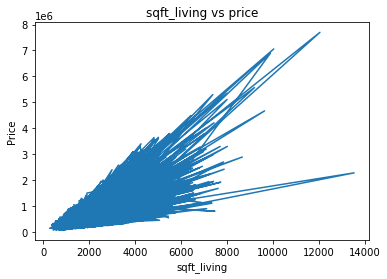

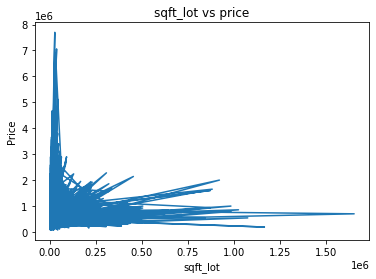

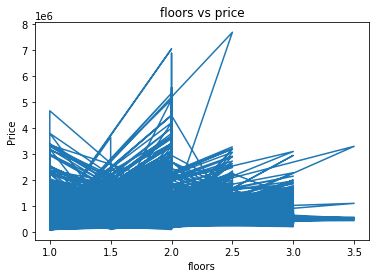

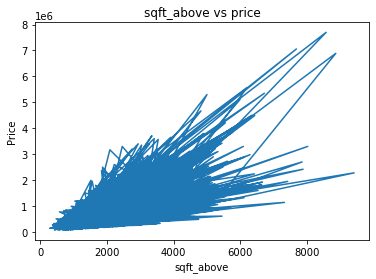

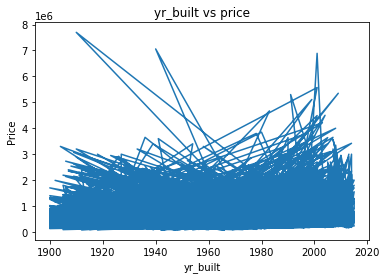

In [7]:
columns=["bedrooms","bathrooms","sqft_living","sqft_lot","floors","sqft_above","yr_built"]
for col_head in columns:
    plot_function(col_head)

There is somewhat a linear relationship between almost all of the independent variables with the dependent variable price on the dataset but in case of yr_built

In [8]:

features=df.iloc[:,1:]
target=df["price"]

In [9]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,stratify=None,random_state=42)

In [21]:

from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor(n_estimators=5)
model1.fit(x_train,y_train)

RandomForestRegressor(n_estimators=5)

In [22]:
score1=model1.score(x_test,y_test)
print(score1)

0.547266710724728


RandomForestRegressor has performed with r2 score of about 50% in the training set

In [9]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(x_train,y_train)
score2=model2.score(x_test,y_test)
print(score2)

0.5650135119055385


The linear regression algorithm performed well with a slightly better r2 score in the training set that is seen above in the result.

In [10]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [11]:
random_forest=RandomForestRegressor()
params={'n_estimators':[i for i in range (1,20)],'max_depth':[i for i in range (1,10)],'bootstrap':[True,False]}
random_forest_cv=GridSearchCV(random_forest,params,cv=5)
random_forest_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]})

In [13]:
random_forest_cv.best_score_

0.614093579516229

In [14]:
random_forest_cv.best_params_

{'bootstrap': True, 'max_depth': 8, 'n_estimators': 19}

The best parameters given by the GridSearchCv process can be seen.

In [15]:
random_forest2=RandomForestRegressor()
randomized_params = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
                   'max_features': ['auto', 'sqrt'],
                   'min_samples_leaf': [1, 2, 4],
                   'min_samples_split': [2, 5, 10],
                   'n_estimators': [130, 180, 230]}
randomized_random_forest=RandomizedSearchCV(random_forest2,randomized_params,cv=5)
randomized_random_forest.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]})

In [16]:
randomized_random_forest.best_score_

0.6228384887723479

In [17]:
randomized_random_forest.best_params_

{'n_estimators': 230,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

Therefore,the RandomizedSearchCV can be seen with many parameters with similar kind of result in GrindSearchCV.We see the best parameters in both RandomizedSearchCV and GrindSearchCV.